In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# !pip install pandas

In [2]:
dados = pd.read_excel('../data/SPDadosCriminais_2024.xlsx')
# dados_2023 = pd.concat([pd.read_excel('../data/SPDadosCriminais_2023.xlsx', sheet_name='JAN_JUN_2023'), pd.read_excel('../data/SPDadosCriminais_2023.xlsx', sheet_name='JUL_DEZ_2023')])
len(dados)

In [5]:
print(len(dados))
# Remover as linhas onde a cidade é "RIO DE JANEIRO"
dados = dados[dados["CIDADE"] != "RIO DE JANEIRO"]

# Tipo de Local: Via Pública
# Data: 2024-03-01 00:00:00
# Cidade: RIO DE JANEIRO

296176


# Entendimento dos Dados

In [6]:
# Descrição das Variáveis
print("Descrição das Variáveis:")
print(dados.columns)

# Tipos de Dados
print("\nTipos de Dados:")
print(dados.dtypes)


Descrição das Variáveis:
Index(['NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'NOME_DELEGACIA', 'CIDADE',
       'ANO_BO', 'NUM_BO', 'DATA_COMUNICACAO', 'DATA_OCORRENCIA_BO',
       'HORA_OCORRENCIA_BO', 'DESC_PERIODO', 'DESCR_TIPOLOCAL', 'BAIRRO',
       'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE',
       'NOME_DELEGACIA_CIRCUNSCRIÇÃO', 'NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO',
       'NOME_SECCIONAL_CIRCUNSCRIÇÃO', 'NOME_MUNICIPIO_CIRCUNSCRIÇÃO',
       'RUBRICA', 'DESCR_CONDUTA', 'NATUREZA_APURADA', 'MES_ESTATISTICA',
       'ANO_ESTATISTICA'],
      dtype='object')

Tipos de Dados:
NOME_DEPARTAMENTO                          object
NOME_SECCIONAL                             object
NOME_DELEGACIA                             object
CIDADE                                     object
ANO_BO                                      int64
NUM_BO                                     object
DATA_COMUNICACAO                   datetime64[ns]
DATA_OCORRENCIA_BO                 datetime64[ns]
HORA_O

In [10]:
# Contagem de valores únicos em colunas categóricas
print(dados['CIDADE'].value_counts())

CIDADE
S.PAULO                118381
CAMPINAS                 8744
GUARULHOS                7901
S.ANDRE                  6085
S.BERNARDO DO CAMPO      4983
                        ...  
UNIAO PAULISTA              1
MONCOES                     1
RIO DE JANEIRO              1
BORA                        1
S.MATEUS                    1
Name: count, Length: 649, dtype: int64


## Valores ausentes


Valores Ausentes por Coluna:
NOME_DEPARTAMENTO                       0
NOME_SECCIONAL                          0
NOME_DELEGACIA                          0
CIDADE                                  0
ANO_BO                                  0
NUM_BO                                  0
DATA_COMUNICACAO                        0
DATA_OCORRENCIA_BO                      0
HORA_OCORRENCIA_BO                  89016
DESC_PERIODO                       207160
DESCR_TIPOLOCAL                     11740
BAIRRO                               4268
LOGRADOURO                              1
NUMERO_LOGRADOURO                   47830
LATITUDE                            30931
LONGITUDE                           30931
NOME_DELEGACIA_CIRCUNSCRIÇÃO            0
NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO         0
NOME_SECCIONAL_CIRCUNSCRIÇÃO            0
NOME_MUNICIPIO_CIRCUNSCRIÇÃO            0
RUBRICA                                 0
DESCR_CONDUTA                       76623
NATUREZA_APURADA                        0
MES_

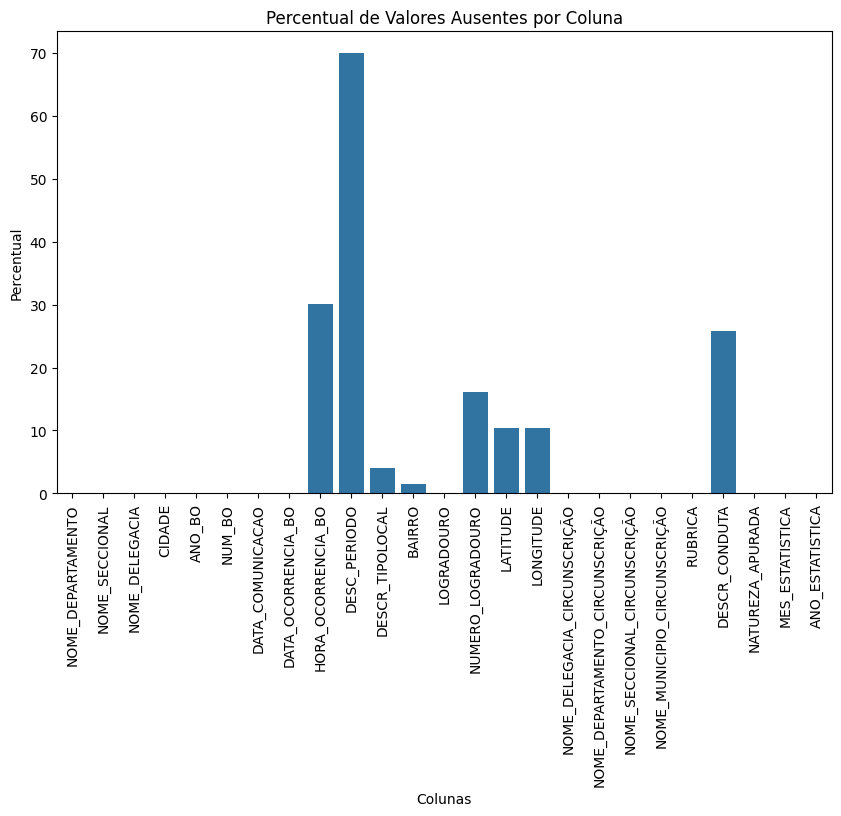

In [7]:
# Valores Ausentes
print("\nValores Ausentes por Coluna:")
print(dados.isnull().sum())

# Distribuição de Valores Ausentes
print("\nDistribuição de Valores Ausentes (Percentual):")
missing_percentage = (dados.isnull().sum() / len(dados)) * 100
print(missing_percentage)


# Visualização da Distribuição de Valores Ausentes
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.title('Percentual de Valores Ausentes por Coluna')
plt.ylabel('Percentual')
plt.xlabel('Colunas')
plt.show()

## Analises iniciais


### Local com maior ocorrencia

In [26]:
dados['DESCR_TIPOLOCAL'].value_counts()

DESCR_TIPOLOCAL
Via Pública               198628
Residência                 22801
Casa                       12540
Terminal/Estação            6447
Comércio e Serviços         4246
                           ...  
Instagram                      1
Sanitário Masculino            1
Roupas Masculinas              1
Assembléia Legislativa         1
Heliporto                      1
Name: count, Length: 283, dtype: int64

DESCR_TIPOLOCAL
Via Pública                                198628
Residência                                  22801
Casa                                        12540
Terminal/Estação                             6447
Comércio e Serviços                          4246
Metroviário e Ferroviário Metropolitano      2652
Estacionamento/Garagem                       2205
Condomínio Residencial                       2055
Unidade Rural                                1809
Area não Ocupada                             1630
Estabelecimento de Ensino                    1581
Restaurante e Afins                          1543
Saúde                                        1096
Rodovia/Estrada                              1067
Centro Comercial/Empresarial                 1062
Name: count, dtype: int64


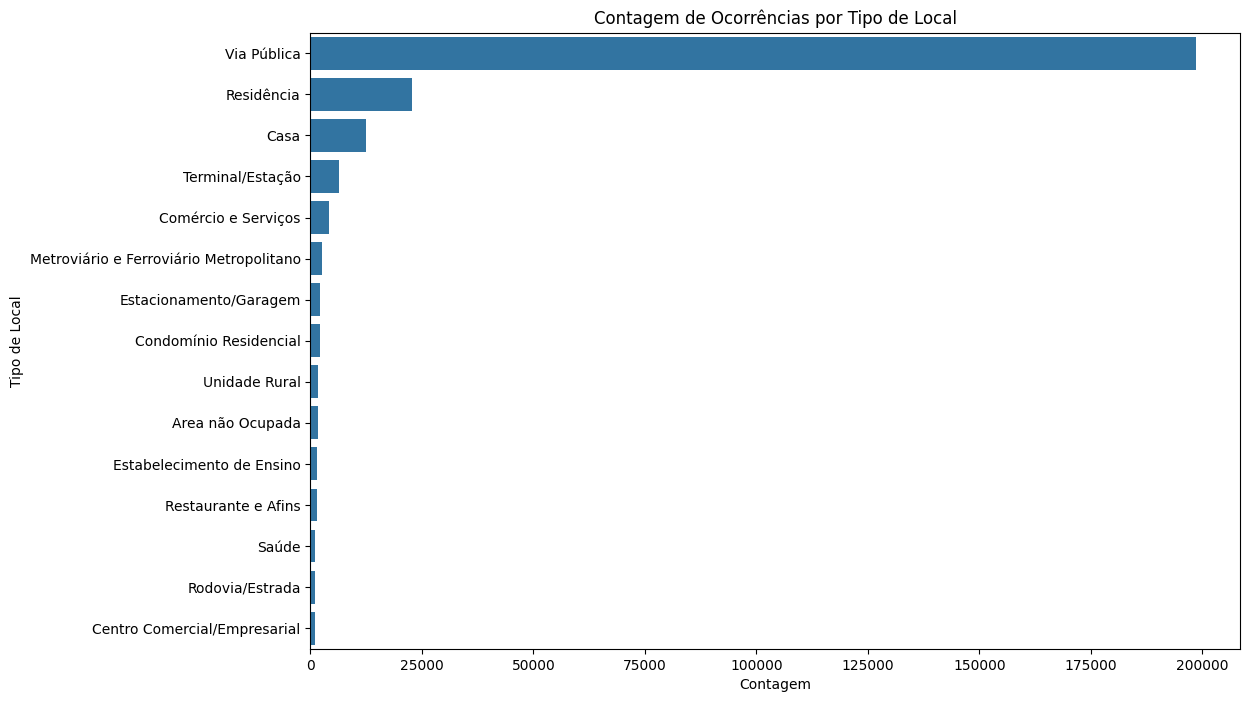

In [39]:
# Contagem de ocorrências por tipo de local

tipo_local_counts = dados['DESCR_TIPOLOCAL'].value_counts()

# Filtrar para obter os top 20 tipos de locais com mais ocorrências
top_20_locais = tipo_local_counts.head(15)

print(top_20_locais)
top_20_locais_df = top_20_locais.reset_index()
top_20_locais_df.columns = ['DESCR_TIPOLOCAL', 'Contagem']

plt.figure(figsize=(12, 8))
sns.barplot(x='Contagem', y='DESCR_TIPOLOCAL', data=top_20_locais_df, order=top_20_locais_df['DESCR_TIPOLOCAL'])
plt.title('Contagem de Ocorrências por Tipo de Local')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Local')
plt.show()


### Analise de correlação

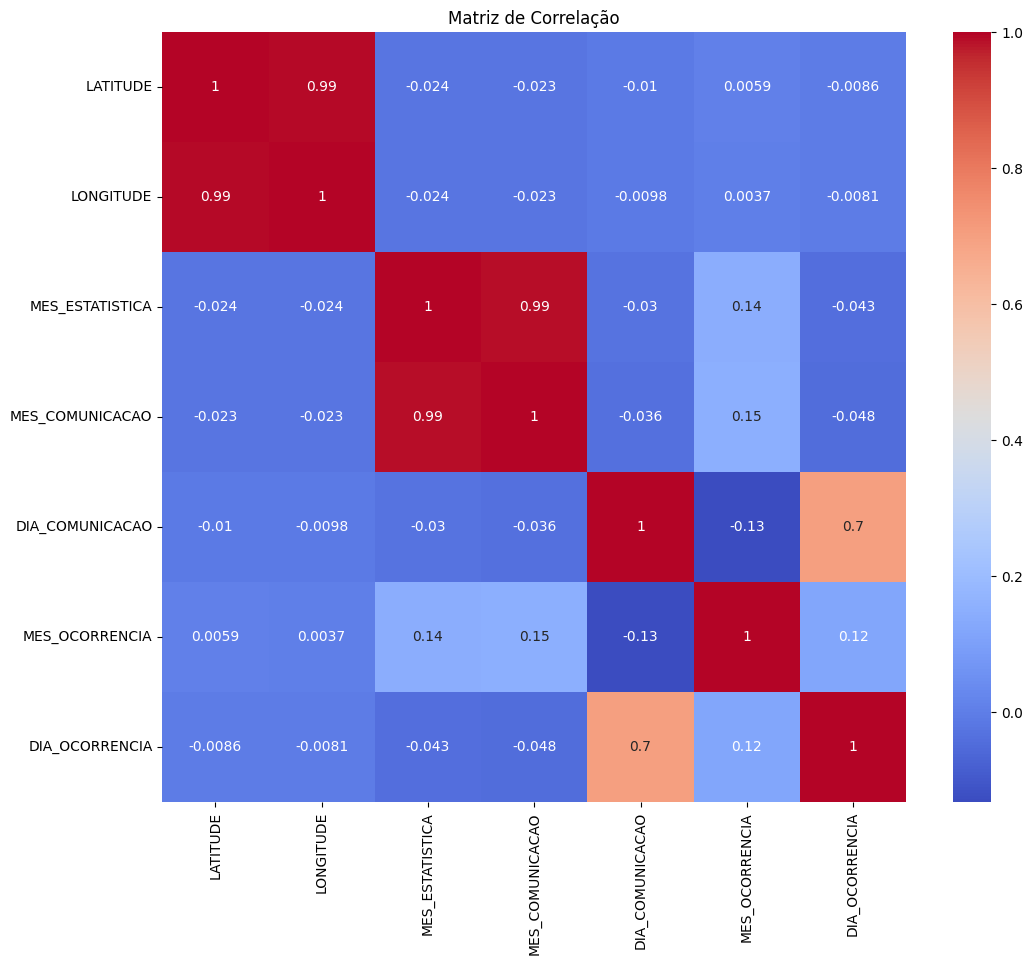

In [53]:
# Converter colunas de data para datetime
dados['DATA_COMUNICACAO'] = pd.to_datetime(dados['DATA_COMUNICACAO'])
dados['DATA_OCORRENCIA_BO'] = pd.to_datetime(dados['DATA_OCORRENCIA_BO'])

# Extrair partes da data para análise
dados['ANO_COMUNICACAO'] = dados['DATA_COMUNICACAO'].dt.year
dados['MES_COMUNICACAO'] = dados['DATA_COMUNICACAO'].dt.month
dados['DIA_COMUNICACAO'] = dados['DATA_COMUNICACAO'].dt.day
dados['ANO_OCORRENCIA'] = dados['DATA_OCORRENCIA_BO'].dt.year
dados['MES_OCORRENCIA'] = dados['DATA_OCORRENCIA_BO'].dt.month
dados['DIA_OCORRENCIA'] = dados['DATA_OCORRENCIA_BO'].dt.day

# Selecionar as colunas relevantes para correlação
colunas_para_correlacao = [ 
                           'LATITUDE', 'LONGITUDE', 'MES_ESTATISTICA', 
                           'MES_COMUNICACAO', 'DIA_COMUNICACAO', 'MES_OCORRENCIA', 'DIA_OCORRENCIA']

dados_numericos = dados[colunas_para_correlacao]
dados_numericos
# Calcular a matriz de correlação entre variáveis numéricas
correlation_matrix = dados_numericos.corr()

# # Plotar o heatmap da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


### Mapa de calor com crimes

In [4]:
import folium
from folium.plugins import HeatMap

# Centro do mapa no estado de São Paulo (latitude e longitude aproximadas)
map_center = [-23.5505, -46.6333]

# Criar um mapa base
mapa = folium.Map(location=map_center, zoom_start=7)

# Adicionar os pontos de crimes como um mapa de calor
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in dados.iterrows() if not pd.isnull(row['LATITUDE']) and not pd.isnull(row['LONGITUDE'])]
HeatMap(heat_data).add_to(mapa)

# Salvar o mapa em um arquivo HTML
mapa.save('mapa_de_crimes.html')


adicionado os cluster

In [1]:
dados

NameError: name 'dados' is not defined

In [5]:
import folium
from folium.plugins import HeatMap
import folium
from folium.plugins import HeatMap, MarkerCluster


# Centro do mapa no estado de São Paulo (latitude e longitude aproximadas)
map_center = [-23.5505, -46.6333]

# Criar um mapa base
mapa = folium.Map(location=map_center, zoom_start=7)

# Adicionar os pontos de crimes como um mapa de calor
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in dados.iterrows() if not pd.isnull(row['LATITUDE']) and not pd.isnull(row['LONGITUDE'])]
HeatMap(heat_data).add_to(mapa)

# Adicionar os pontos de crimes usando clusters
marker_cluster = MarkerCluster().add_to(mapa)
for index, row in dados.iterrows():
    if not pd.isnull(row['LATITUDE']) and not pd.isnull(row['LONGITUDE']):
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=f"Tipo de Local: {row['DESCR_TIPOLOCAL']}<br>Data: {row['DATA_OCORRENCIA_BO']}<br>Cidade: {row['CIDADE']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster)

# Salvar o mapa em um arquivo HTML
mapa.save('cluster_mapa_de_crimes.html')

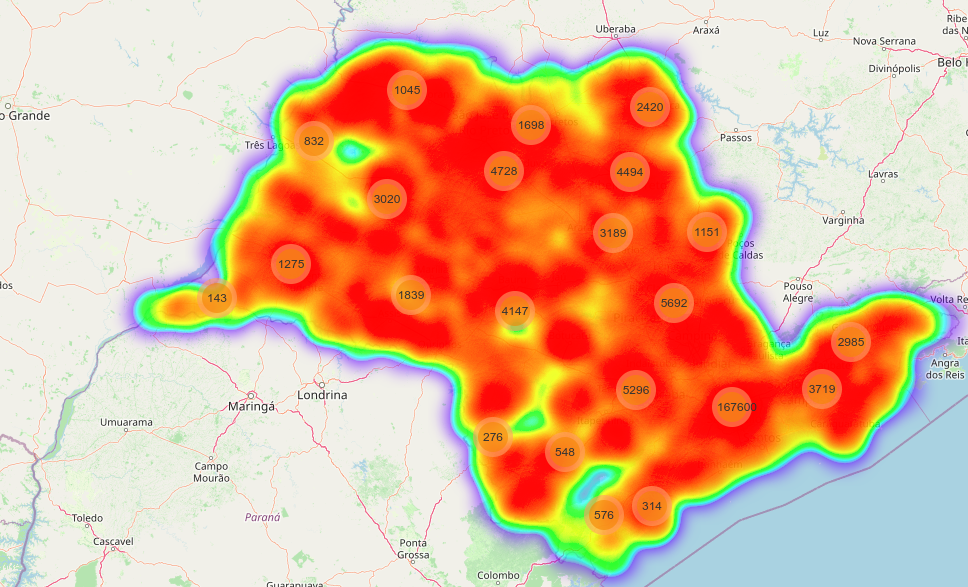

## Estatísticas Descritivas

In [15]:
# Distribuição temporal
print(dados['ANO_BO'].value_counts())
print(dados['MES_ESTATISTICA'].value_counts())
print(dados['HORA_OCORRENCIA_BO'].value_counts())
print(dados['DESC_PERIODO'].value_counts())

ANO_BO
2024    296133
2023        43
Name: count, dtype: int64
MES_ESTATISTICA
3    101205
1     99255
2     95716
Name: count, dtype: int64
HORA_OCORRENCIA_BO
20:00:00    3575
10:00:00    3198
22:00:00    3194
21:00:00    3124
15:00:00    3033
            ... 
17:50:31       1
09:40:01       1
14:35:14       1
04:15:46       1
10:39:17       1
Name: count, Length: 16853, dtype: int64
DESC_PERIODO
A tarde            22467
A noite            20396
Pela manhã         19125
De madrugada       16834
Em hora incerta    10194
Name: count, dtype: int64


# Hipóteses - proximo notebook

<!-- ## O número de crimes tem aumentado ou diminuído ao longo dos anos/meses ? -->
<!-- 
vamos usar a data de comunicação (DATA_COMUNICACAO) por que se a gente usar a data bo vai ser inconsistente porque pode ter ocorrido um crime e a pessoa só denunciar 10 anos depois. -->

In [7]:
# dados.groupby(['ANO_ESTATISTICA', 'MES_ESTATISTICA']).size().reset_index(name='counts')

# # dados['DATA_COMUNICACAO']

In [5]:
# # Converter colunas de datas para datetime
# dados['DATA_COMUNICACAO'] = pd.to_datetime(dados['DATA_COMUNICACAO'], format='%Y-%m-%d')

# # Extrair ano e mês das datas
# dados['ano'] = dados['DATA_COMUNICACAO'].dt.year
# dados['mes'] = dados['DATA_COMUNICACAO'].dt.month

# dados_2023_2024 = dados[dados['ano'].isin([2023, 2024])]

# ocorrencias_por_mes = dados_2023_2024.groupby(['ano', 'mes']).size().reset_index(name='counts')

# plt.figure(figsize=(14, 8))
# sns.lineplot(data=ocorrencias_por_mes, x='mes', y='counts', hue='ano', palette='tab10')
# plt.xlabel('Mês')
# plt.ylabel('Número de Ocorrências')
# plt.title('Ocorrências por Mês em 2023 e 2024')
# plt.legend(title='Ano', loc='upper right')
# plt.grid(True)
# plt.show()

In [6]:
# dados.groupby(['ano', 'mes']).size().reset_index(name='counts')